# Predicting House Prices in California with `LinearRegression()`

In this lab you will start inspect, analyze, visualize house price data from different districts in California, US. After having performed analysis, EDA and some feature engineering, you will build your own `LinearRegression()`  with `SkLearn`. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Part 1 - Inspection and Cleaning


#### Import and Inspect your data

Read the `housing.csv` file and make use of some methods to understand your data better. Below is an explanation of the features you are going to work with:

1. **longitude:**  geographical coordinate, east to west position of district
2. **latitude:**  geographical coordinate, north to south position of district
3. **housing_median_age:** the median age of houses in district
4. **total_rooms** Sum of all rooms in district
5. **total_bedrooms** Sum of all bedrooms in district
6. **population:** total population in district
7. **households:** total households in district
8. **median_income:** median household income in district 
9. **median_house_value:** median house value in district
10. **ocean_proximity:** District´s proximity to the ocean

In [2]:
housing_data = pd.read_csv("../data/housing.csv")

In [3]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Histograms
Make histograms of all your numeric columns in order to get a good understanding of the distribution of your data points. What do you see?

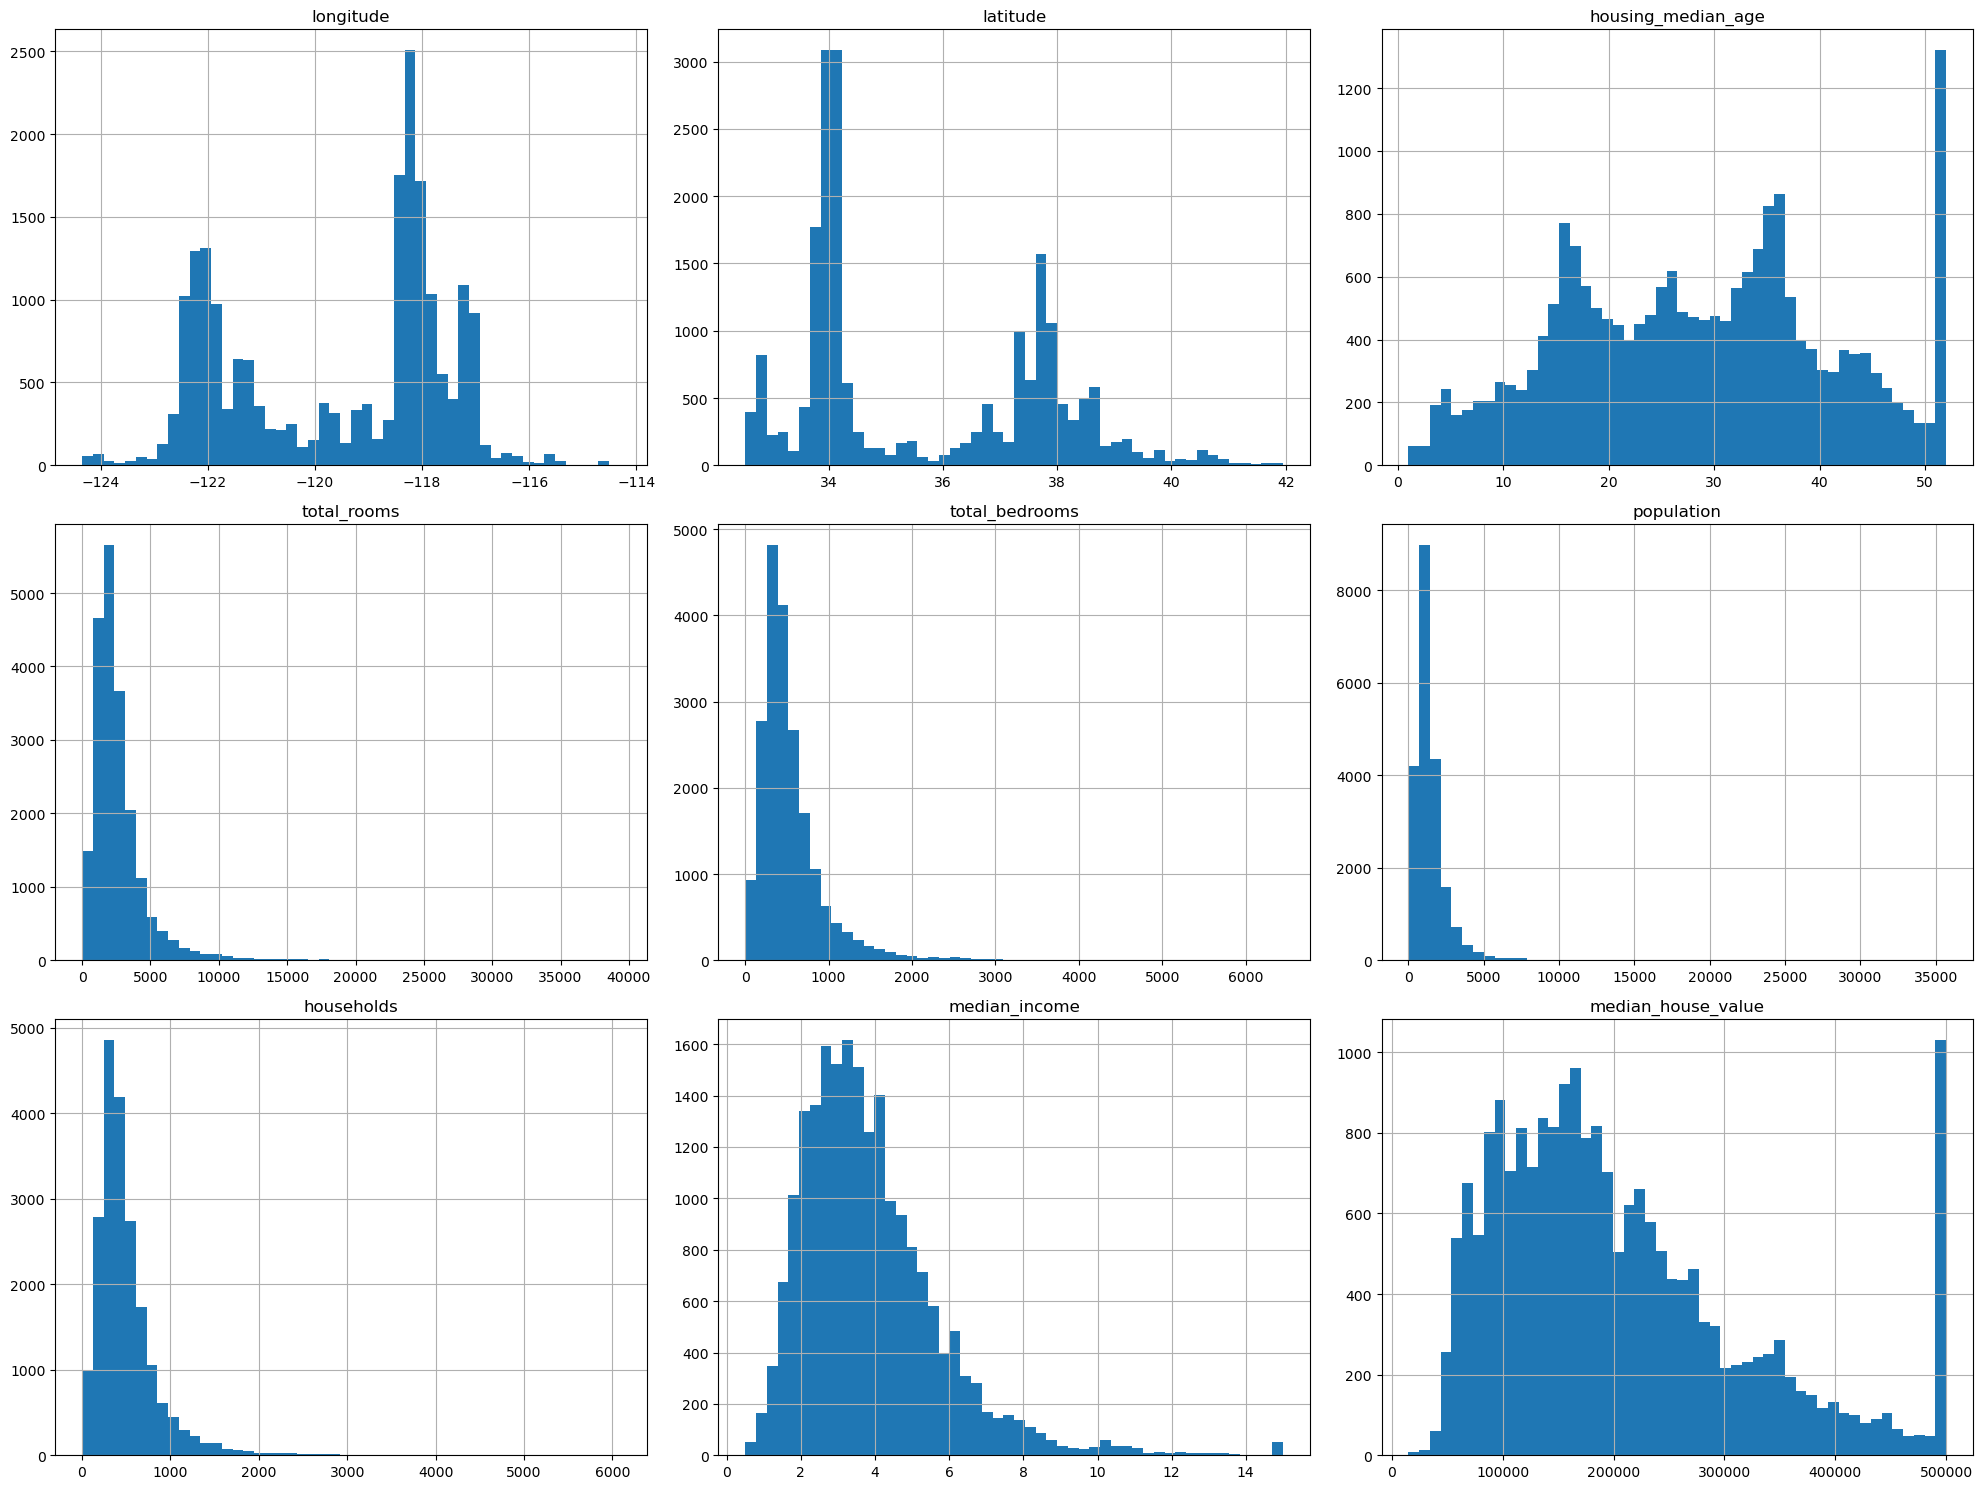

In [6]:
housing_data.drop("ocean_proximity", axis=1).hist(bins=50, figsize=(20, 15))

plt.tight_layout()
plt.show()

#### Let's create some features a tidy up our data

1. Locate your NaN values and make a decision on how to handle them. Drop, fill with mean, or something else, it is entirely up to you. 

In [7]:
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
housing_data = housing_data.dropna()
housing_data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

2. Create three new columns by using simple arithmetic operations. Create one column with "rooms per household", one with "population per household",  and one with "bedrooms per room".

In [9]:
housing_data["rooms_per_household"] = housing_data["total_rooms"] / housing_data["households"]

In [10]:
housing_data["population_per_household"] = housing_data["population"] / housing_data["households"]

In [11]:
housing_data["bedrooms_per_room"] = housing_data["total_bedrooms"] / housing_data["total_rooms"]

3. If you check the largest and smallest values of your "rooms per houshold column" you will see two outliers and two values that are just wrong. Drop the four values by index.

In [12]:
housing_data["rooms_per_household"].sort_values()
# Wrong values (less than 1): smallest two 
# Outliers (more than double the next value): largest two 

5916       0.846154
8219       0.888889
3126       1.000000
14818      1.130435
17820      1.130435
            ...    
11862     59.875000
1913      61.812500
12447     62.422222
1979     132.533333
1914     141.909091
Name: rooms_per_household, Length: 20433, dtype: float64

In [59]:
housing_data.drop([5916, 8219, 1979, 1914], inplace=True)

# Part 2 - Exploratory Data Analysis



#### Let's find out what factors have an influence on our predicting variable

1. Let's check out the distribution of our "median house value". Visualize your results with 100 bins.

<Axes: xlabel='median_house_value', ylabel='Count'>

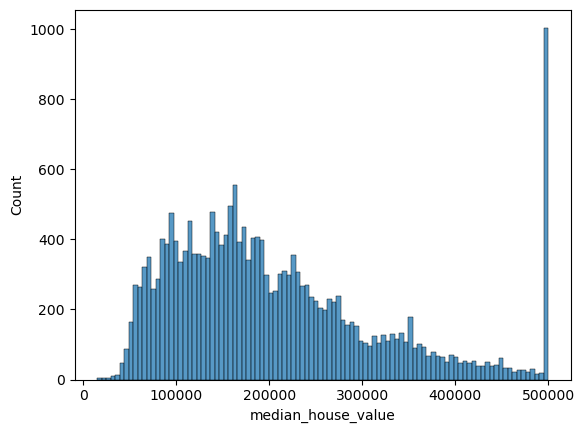

In [14]:
sns.histplot(housing_data["median_house_value"], bins=100)

2. Check out what variables correlates the most with "median house value"

In [15]:
correlations = housing_data.drop("ocean_proximity", axis=1).corr()['median_house_value'].sort_values(ascending=False)
correlations
# median_income 

median_house_value          1.000000
median_income               0.688355
rooms_per_household         0.151344
total_rooms                 0.133294
housing_median_age          0.106432
households                  0.064894
total_bedrooms              0.049686
population_per_household   -0.023639
population                 -0.025300
longitude                  -0.045398
latitude                   -0.144638
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

3. Let's check out the distribution of the column that has the highest correlation to "median house value". Visualize your results with 100 bins.

<Axes: xlabel='median_income', ylabel='Count'>

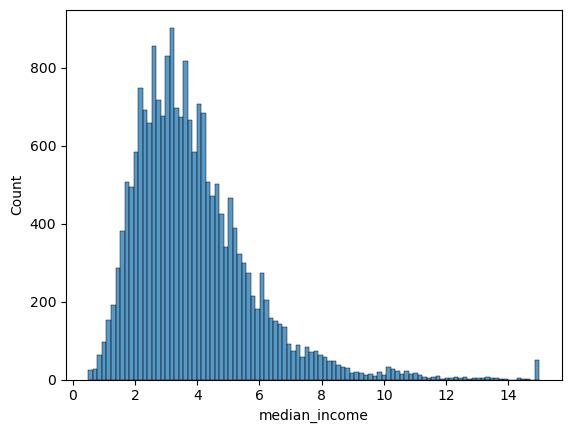

In [16]:
sns.histplot(housing_data["median_income"], bins=100)

4. Visualize the "median house value" and "median income" in a jointplot (kind="reg"). What do you see?

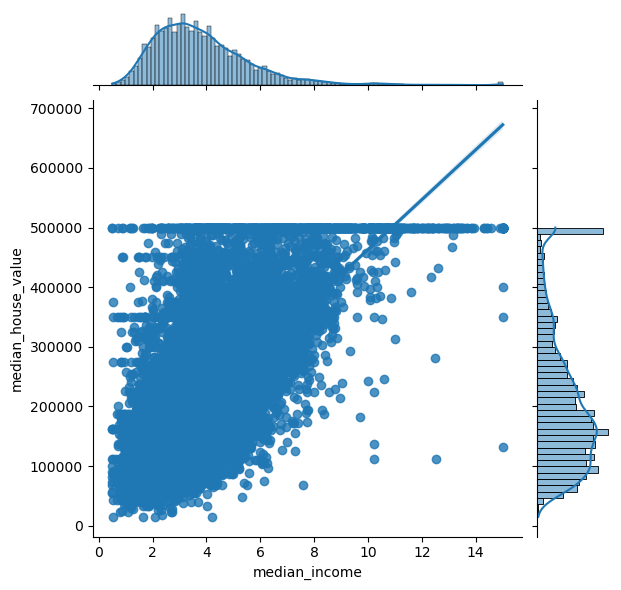

In [17]:
sns.jointplot(housing_data, x="median_income", y="median_house_value", kind="reg")

5. Make the same visualization as in the above, but, cahnge the kind parameter to "kde". What extra information does this type of visualization convey, that the one in the above does not?

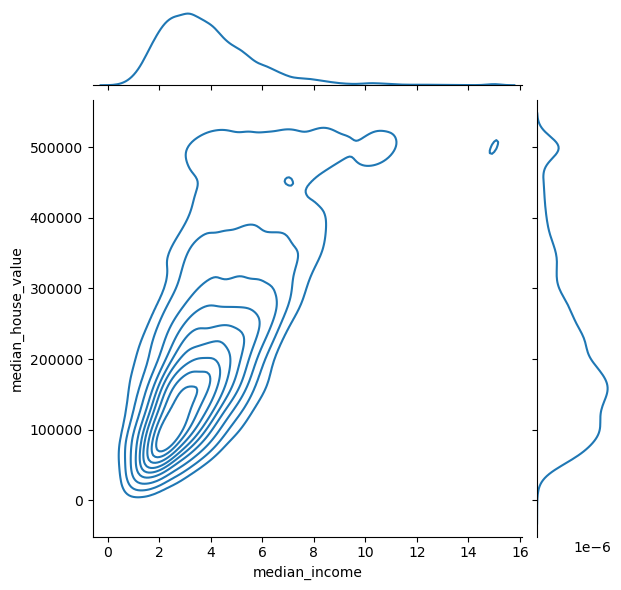

In [18]:
sns.jointplot(housing_data, x="median_income", y="median_house_value", kind="kde")

#### Let's get schwifty with some EDA

1. Create a new categorical column from the "median income" with the following quartiles `[0, 0.25, 0.5, 0.75, 0.95, 1]` and label them like this `["Low", "Below_Average", "Above_Average", "High", "Very High"]` and name the column "income_cat"

In [19]:
quartiles = [0, 0.25, 0.5, 0.75, 0.95, 1]
labels = ["Low", "Below_Average", "Above_Average", "High", "Very High"]
housing_data["income_cat"] = pd.qcut(housing_data['median_income'], q=quartiles, labels=labels)
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_room,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591,Very High
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797,Very High
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516,High
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458,High
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,2.560606,0.224625,Low
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,3.122807,0.215208,Low
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,2.325635,0.215173,Low
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,2.123209,0.219892,Low


2. Using the Seaborn library, plot the count of your new column and set the `hue` to "ocean_proximity". What interesting things can you see?

<Axes: xlabel='income_cat', ylabel='count'>

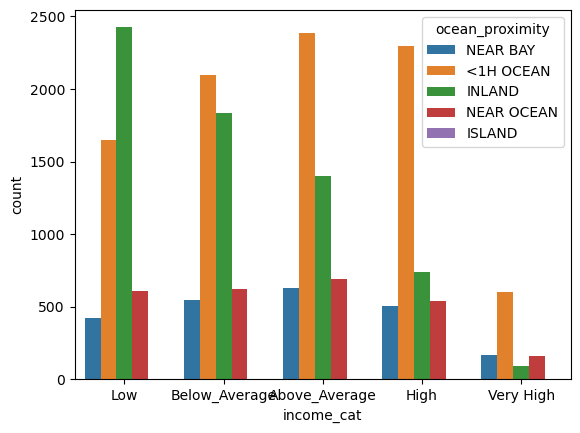

In [20]:
sns.countplot(data=housing_data, x="income_cat", hue="ocean_proximity")

3. Create two barplots where you set "y="median_house_value" on both, and the x is first "income cat" and then "ocean_proximity". How does these two graphs complement what you saw in the graph in your previous question?

<Axes: xlabel='income_cat', ylabel='median_house_value'>

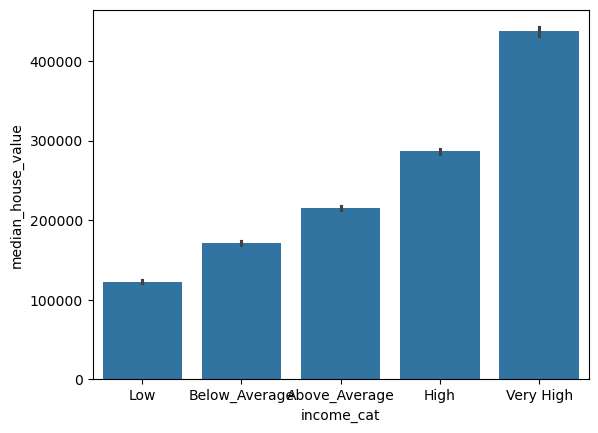

In [21]:
sns.barplot(data=housing_data, x="income_cat", y="median_house_value", 
            order=["Low", "Below_Average", "Above_Average", "High", "Very High"])

<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

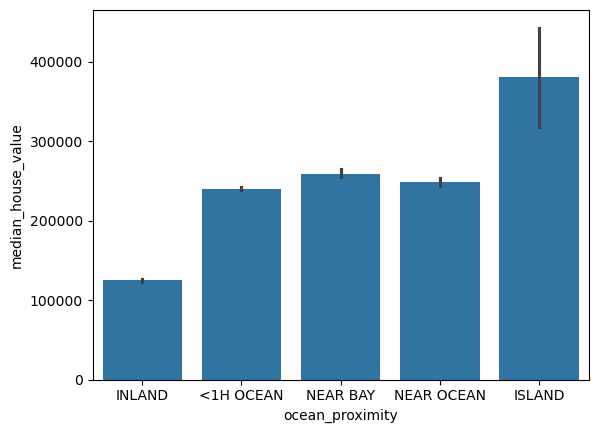

In [22]:
sns.barplot(data=housing_data, x="ocean_proximity", y="median_house_value", 
            order=["INLAND", "<1H OCEAN", "NEAR BAY", "NEAR OCEAN", "ISLAND"])

4. Create a pivoted dataframe where you have the values of the "income cat" column as indices and the values of the "ocean_proximity" column as columns. Also drop the "ISLAND" column that you'll get.

In [ ]:
df_pivoted = housing_data.pivot_table(index="income_cat", columns="ocean_proximity", values="median_house_value")
df_pivoted.drop("ISLAND", axis=1, inplace=True)

/var/folders/gn/wg9xjv455tj2c2jns2j4b8yw0000gn/T/ipykernel_36245/3920814947.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivoted = housing_data.pivot_table(index="income_cat", columns="ocean_proximity", values="median_house_value")


ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
income_cat,,,,
Low,161337.076923,84820.626650,155122.052133,148027.826514
Below_Average,197236.013829,115124.088283,220196.177656,208665.190096
Above_Average,232278.358759,147846.891351,261965.251582,255293.813584
High,292208.766217,208095.566622,322566.033663,337446.227778
Very High,439784.235489,347571.736842,451015.078788,468739.723270


5. Turn your pivoted dataframe into a heatmap. The heatmap should have annotations in integer format.

<Axes: xlabel='ocean_proximity', ylabel='income_cat'>

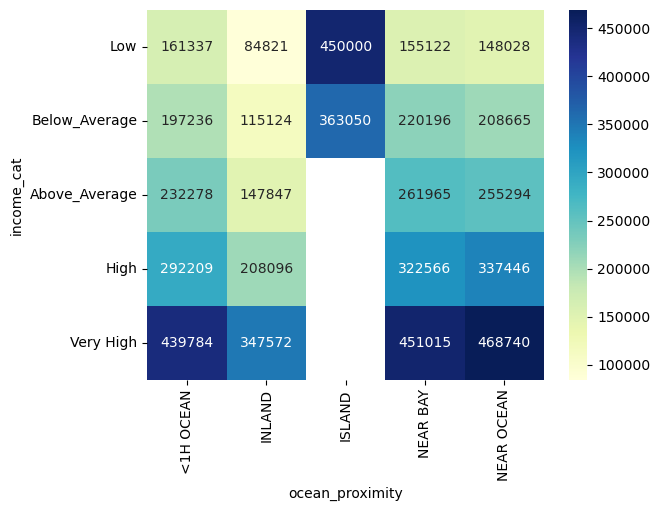

In [24]:
sns.heatmap(df_pivoted, annot=True, fmt=".0f", cmap="YlGnBu")

# Part 3 - Preparing your Data



#### Splitting, Preparing and Engineering some Features

1. Let's drop the "income_cat" column as it has served its purpose already. We don't need for our model as we already have "median income".
Not dropping "incom cat" will lead to multicolinearity.

In [ ]:
housing_data.drop("income_cat", axis=1, inplace=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,2.560606,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,3.122807,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,2.325635,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,2.123209,0.219892


2. Select your floating point columns and standardize your data by calculating the Z-score. You can apply the `stats.zscore()` method in a lambda function. Save your results to a variable called `z_scored`. 

In [29]:
import scipy.stats as stats

float_cols = housing_data.select_dtypes(include=['float64'])
z_scored = float_cols.apply(lambda x: stats.zscore(x))

3. Turn the only categorical columns into dummies. Be vary of the dummy trap, to avoid multicolinearity.

4. Save our predicting variable to `y`.

In [27]:
y = z_scored["median_house_value"]

5. Concatenate `z_scored` and `dummies` and drop the predicting variable. Save to the varible `X`.

In [31]:
X = z_scored.drop("median_house_value", axis=1)

# Part 4 - Machine Learning 




#### Train, Test, Split

1. Import `train_test_split` and split your data accordingly. Choose an appropriate test size.

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Building and Training our Model

2. Build, fit and train a `LinearRegression` model. 

In [34]:
from sklearn.linear_model import LinearRegression

housing_model = LinearRegression()
housing_model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


3. In a scatterplot, visualize the y_train on your x-axis and your predictions on the y-axis. How does your training predictions look? 

<Axes: xlabel='median_house_value'>

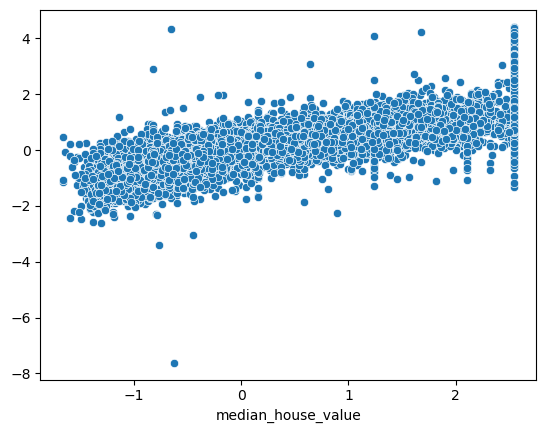

In [35]:
y_pred = housing_model.predict(X_train)
sns.scatterplot(x=y_train, y=y_pred)

4. From the sklearn metrics module, print the mean_squared_error and R^2-score. What does the metrics tell us?

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

0.3506565784391056 0.6470158625357814


#### Final Predictions

1. Now you are ready to make prediction on the test data. Do that and visualize your results in a new scatterplot.

In [40]:
y_pred_test = housing_model.predict(X_test)

<Axes: xlabel='median_house_value'>

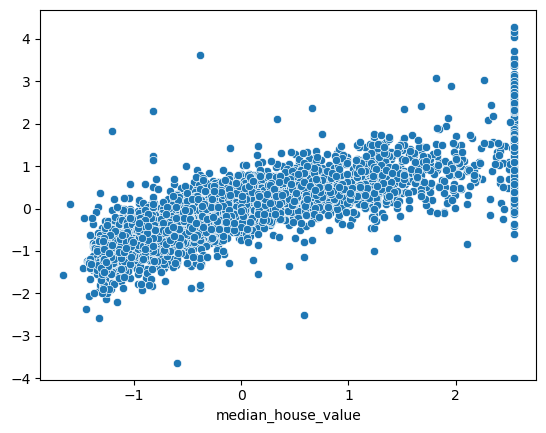

In [41]:
sns.scatterplot(x=y_test, y=y_pred_test)

2. Print the mean_squared_error and R^2-score again. What has happened?

In [43]:
mse = mean_squared_error(y_test, y_pred_test)
mse

0.3648955677059185

In [44]:
r2 = r2_score(y_test, y_pred_test)
r2


0.6444552331796862

3. There is another metric called Root mean squared error, Which is the square root of the MSE. Calculate the RMSE.

In [45]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_test, y_pred_test)
rmse

0.6040658637151404

# Bonus Questions 1

1. Create a dataframe with two columns, one consisting of the y_test and one of your model's predictions.

In [46]:
df = pd.DataFrame({"y_test": y_test, "y_pred": y_pred_test})
df

,y_test,y_pred
14416,0.337301,0.022007
16383,-0.597442,-0.450355
7731,0.098201,-0.076903
1410,0.120725,-0.301883
1335,-0.315027,0.116735
...,...,...
8291,2.539456,0.579439
6274,-0.424181,-0.338419
2997,-0.924039,-0.705497
13440,-0.685805,-0.498354


2. Make a series of of your new dataframe, by calculating the predicted error in absolut numbers. Save this series to variable name `absolute_errors`.

In [48]:
absolute_errors = abs(df["y_test"] - df["y_pred"])
absolute_errors

14416    0.315294
16383    0.147086
7731     0.175103
1410     0.422607
1335     0.431761
           ...   
8291     1.960017
6274     0.085762
2997     0.218542
13440    0.187451
14797    0.197611
Length: 4087, dtype: float64

3. If you take the mean of your series, you will get the mean absolute errors, which is another metric for Linear Regressions.

In [60]:
mae = absolute_errors.mean()
mae

np.float64(0.43736344892506057)

# Bonus Question 2 - Build a Random Forest Regressor

1. Build, fit and train a `RandomForestRegressor` model. Do this by following the same staps that you followed when building your `LinearRegression`.

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
housing_model_rfr = RandomForestRegressor()

In [55]:
housing_model_rfr.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

2. Make prediction on the test data and evaluate you results.

In [57]:
y_pred_test_rfr = housing_model_rfr.predict(X_test)

In [58]:
r2_rfr = r2_score(y_test, y_pred_test_rfr)
r2_rfr

0.8005400498017363